In [1]:
from testproblems import random_problem_with_artifacts

In [2]:
from datastructures.operators import invert_edges, sort_scc, reorder_merge_solve, standardize_comp
from datastructures.rendering import render_incidence
from datastructures.graphutils import flat_graph_formulation, copy_dicts
from datastructures.tearing import feedbacks

In [3]:
m = 5
n = 7
seed = 8
sparsity = 0.5

In [4]:
kwargs = random_problem_with_artifacts(m,n,seed,sparsity)
eq_incidence, outset, eqnidxs, D_notype = kwargs['eq_incidence'], kwargs['outset'], kwargs['eqnidxs'], kwargs['D']

In [5]:
edges_default = invert_edges(eq_incidence, newout=outset)
edges_default = tuple({comp: tuple(var-len(eqnidxs) if var is not None else var for var in allvars) for comp,allvars in E.items()} for E in edges_default)
tree_default = ({elt:1 for elt in eqnidxs},{},{})

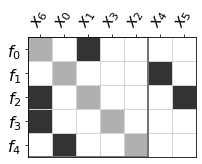

In [6]:
_, ax = render_incidence(edges_default, tree_default, figname="transformations_initial.png", save=False, figsize=((3,3)))

### Reduce all

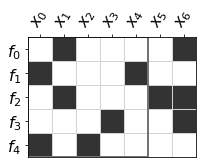

In [24]:
Ein = {comp: tuple(var-len(eqnidxs) if var is not None else var for var in allvars) for comp,allvars in eq_incidence.items()}
Eout = {comp: (None,) for comp in Ein.keys()}
edges_reduced = Ein, Eout, {}
_, ax = render_incidence(edges_reduced, tree_default, figname="transformations_reduce_all.png", save=True, figsize=((3,3)))

### Reduction based on feedback

In [13]:
guessvars, feedbackcomps = feedbacks(D_notype, eqnidxs)

In [19]:
edges_feedback = copy_dicts(edges_default)
tree_feedback = copy_dicts(tree_default)
for feedbackcomp in feedbackcomps:
    edges_feedback, vtree_feedback = standardize_comp(edges_feedback, tree_feedback[2], tree_feedback[0], feedbackcomp)
    tree_feedback = tree_feedback[0], tree_feedback[1], vtree_feedback

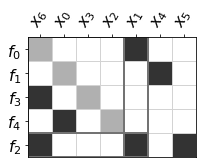

In [21]:
_, ax = render_incidence(edges_feedback, tree_feedback, figname="transformations_feedback.png", save=True, figsize=((3,3)))

### Dulmage-Mendhelson

In [8]:
D = flat_graph_formulation(*edges_default)

In [9]:
merge_order = sort_scc(D)

In [10]:
merge_order

[{f_1}, {f_0, f_2}, {f_3}, {f_4}]

In [86]:
minmdf = reorder_merge_solve(edges_default, tree_default, merge_order, 1, mdf=True)

In [87]:
minidf = reorder_merge_solve(edges_default, tree_default, merge_order, 1, mdf=False)

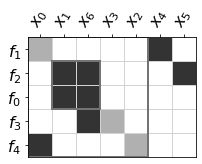

In [96]:
_, ax = render_incidence(*minmdf, figname="minmdf.png", save=True, figsize=((3,3)))

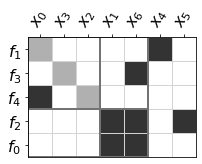

In [97]:
_, ax = render_incidence(*minidf, figname="minidf.png", save=True, figsize=((3,3)))